In [1]:
import os
import pandas as pd

# Define the directory containing the cleaned CIRFA2022 buoy data
cirfa_data_dir = 'data/buoy_data/cirfa2022/cleaned_data/'

# List all CSV files in the directory
cirfa_files = [f for f in os.listdir(cirfa_data_dir) if f.endswith('.csv')]

# Load each CSV into a dictionary with buoy IDs as keys
# Assuming buoy ID is part of the filename, e.g., buoy1.csv, buoy2.csv, etc.
buoy_data = {}
for file in cirfa_files:
    buoy_id = os.path.splitext(file)[0]  # Removes the .csv extension
    file_path = os.path.join(cirfa_data_dir, file)
    df = pd.read_csv(file_path, parse_dates=['datetime'])
    buoy_data[buoy_id] = df

print(f"Loaded data for {len(buoy_data)} buoys.")


Loaded data for 14 buoys.


In [2]:
# Initialize a list to store start and end times
time_summary = []

for buoy_id, df in buoy_data.items():
    start_time = df['datetime'].min()
    end_time = df['datetime'].max()
    time_summary.append({
        'Buoy ID': buoy_id,
        'Start Time': start_time,
        'End Time': end_time
    })

# Create a DataFrame from the summary
time_table = pd.DataFrame(time_summary)

print(time_table)


           Buoy ID          Start Time            End Time
0   CIRFA22_206771 2022-05-02 14:13:02 2022-07-17 04:31:23
1   CIRFA22_206759 2022-04-26 14:30:20 2022-12-14 02:00:39
2   CIRFA22_206764 2022-04-25 17:00:37 2022-12-14 02:00:39
3   CIRFA22_206770 2022-04-26 11:00:30 2022-12-14 01:00:38
4   CIRFA22_206766 2022-05-05 11:30:39 2022-09-09 06:30:27
5   CIRFA22_206799 2022-05-06 13:36:19 2022-12-14 02:30:38
6   CIRFA22_206761 2022-05-02 15:30:24 2022-07-03 13:00:37
7   CIRFA22_206794 2022-04-24 20:30:39 2022-09-20 16:30:38
8   CIRFA22_206810 2022-04-26 13:00:33 2022-08-27 02:00:41
9   CIRFA22_206812 2022-05-02 12:33:49 2022-10-20 01:30:38
10  CIRFA22_206769 2022-05-04 15:00:34 2022-09-01 06:00:38
11  CIRFA22_206755 2022-05-06 12:31:14 2022-07-14 18:30:26
12  CIRFA22_206797 2022-05-06 15:00:38 2022-08-09 22:00:39
13  CIRFA22_206754 2022-04-26 15:00:38 2022-07-17 22:30:40


In [3]:
# Define study area boundaries (example coordinates)
min_lon, max_lon = -20, 20    # Adjust as per your study area
min_lat, max_lat = 70, 90     # Adjust as per your study area

# Function to filter buoy data within the study area
def filter_buoys_by_area(buoy_data, min_lon, max_lon, min_lat, max_lat):
    filtered_buoy_data = {}
    for buoy_id, df in buoy_data.items():
        filtered_df = df[
            (df['longitude'] >= min_lon) & (df['longitude'] <= max_lon) &
            (df['latitude'] >= min_lat) & (df['latitude'] <= max_lat)
        ]
        if not filtered_df.empty:
            filtered_buoy_data[buoy_id] = filtered_df
    return filtered_buoy_data

# Apply the filter
filtered_buoy_data = filter_buoys_by_area(buoy_data, min_lon, max_lon, min_lat, max_lat)

print(f"Number of buoys within study area: {len(filtered_buoy_data)}")


Number of buoys within study area: 14


In [4]:
# Extract start and end times of filtered buoys
filtered_time_table = []

for buoy_id, df in filtered_buoy_data.items():
    start_time = df['datetime'].min()
    end_time = df['datetime'].max()
    filtered_time_table.append({
        'Buoy ID': buoy_id,
        'Start Time': start_time,
        'End Time': end_time
    })

# Create a DataFrame
filtered_time_df = pd.DataFrame(filtered_time_table)

print(filtered_time_df)


           Buoy ID          Start Time            End Time
0   CIRFA22_206771 2022-05-02 14:13:02 2022-07-17 04:31:23
1   CIRFA22_206759 2022-04-26 14:30:20 2022-07-04 22:00:39
2   CIRFA22_206764 2022-04-25 17:00:37 2022-06-23 16:00:38
3   CIRFA22_206770 2022-04-26 11:00:30 2022-07-15 15:00:38
4   CIRFA22_206766 2022-05-05 11:30:39 2022-08-27 04:30:38
5   CIRFA22_206799 2022-05-06 13:36:19 2022-08-26 07:00:37
6   CIRFA22_206761 2022-05-02 15:30:24 2022-07-03 13:00:37
7   CIRFA22_206794 2022-04-24 20:30:39 2022-09-20 16:30:38
8   CIRFA22_206810 2022-04-26 13:00:33 2022-07-10 05:00:37
9   CIRFA22_206812 2022-05-02 12:33:49 2022-10-18 22:30:36
10  CIRFA22_206769 2022-05-04 15:00:34 2022-09-01 06:00:38
11  CIRFA22_206755 2022-05-06 12:31:14 2022-07-14 18:30:26
12  CIRFA22_206797 2022-05-06 15:00:38 2022-07-31 07:30:38
13  CIRFA22_206754 2022-04-26 15:00:38 2022-07-11 23:30:40


In [5]:
# Overall start is the latest of the start times
overall_start = filtered_time_df['Start Time'].max()

# Overall end is the earliest of the end times
overall_end = filtered_time_df['End Time'].min()

print(f"Selected analysis window: {overall_start} to {overall_end}")


Selected analysis window: 2022-05-06 15:00:38 to 2022-06-23 16:00:38


In [6]:
# Define the selected analysis window
analysis_start = overall_start
analysis_end = overall_end

# Filter buoy data within the analysis window
final_buoy_data = {}
for buoy_id, df in filtered_buoy_data.items():
    mask = (df['datetime'] >= analysis_start) & (df['datetime'] <= analysis_end)
    filtered_df = df.loc[mask]
    if not filtered_df.empty:
        final_buoy_data[buoy_id] = filtered_df

print(f"Number of buoys with data in the analysis window: {len(final_buoy_data)}")


Number of buoys with data in the analysis window: 14


In [8]:
from geopy.distance import geodesic

# Function to calculate drift speed
def calculate_drift_speed(df):
    # Sort by datetime
    df = df.sort_values('datetime').reset_index(drop=True)
    
    # Calculate distance between consecutive points in meters
    distances = []
    speeds = []
    
    for i in range(1, len(df)):
        coord1 = (df.loc[i-1, 'latitude'], df.loc[i-1, 'longitude'])
        coord2 = (df.loc[i, 'latitude'], df.loc[i, 'longitude'])
        distance = geodesic(coord1, coord2).meters  # Distance in meters
        
        # Calculate time difference in hours
        time_diff = (df.loc[i, 'datetime'] - df.loc[i-1, 'datetime']).total_seconds() / 3600  # Hours
        
        if time_diff > 0:
            speed = distance / (time_diff * 1000)  # Convert meters to kilometers
            speeds.append(speed)  # km/hour
        else:
            speeds.append(0)
        
        distances.append(distance)
    
    # Assign speeds to the DataFrame
    df = df.iloc[1:].copy()  # Remove the first row which has no speed
    df['speed_kmh'] = speeds
    
    return df

# Apply the function to all buoys
final_buoy_data_with_speed = {}
for buoy_id, df in final_buoy_data.items():
    df_with_speed = calculate_drift_speed(df)
    final_buoy_data_with_speed[buoy_id] = df_with_speed

# Combine all buoys into a single DataFrame
combined_daily = pd.concat(final_buoy_data_with_speed, names=['Buoy ID', 'Index']).reset_index(level=0)

print(combined_daily.head())


              Buoy ID            datetime   latitude  longitude  speed_kmh
Index                                                                     
1      CIRFA22_206771 2022-05-06 15:30:27  79.051732  -8.482399   0.352245
2      CIRFA22_206771 2022-05-06 16:00:40  79.051581  -8.490014   0.322466
3      CIRFA22_206771 2022-05-06 16:30:38  79.051326  -8.497582   0.326426
4      CIRFA22_206771 2022-05-06 17:00:38  79.050922  -8.506550   0.391005
5      CIRFA22_206771 2022-05-06 17:30:38  79.050582  -8.517112   0.454480


In [9]:
# Resample each buoy's data to daily frequency and calculate median and IQR
daily_stats_list = []

for buoy_id, df in final_buoy_data_with_speed.items():
    # Set datetime as index
    df = df.set_index('datetime')
    
    # Resample to daily frequency
    daily = df['speed_kmh'].resample('D').agg(['median', 'quantile'])
    
    # Extract IQR
    daily['IQR_lower'] = df['speed_kmh'].resample('D').quantile(0.25)
    daily['IQR_upper'] = df['speed_kmh'].resample('D').quantile(0.75)
    
    # Add buoy ID
    daily['Buoy ID'] = buoy_id
    
    # Reset index
    daily = daily.reset_index()
    
    daily_stats_list.append(daily)

# Combine all buoys' daily stats
all_daily_stats = pd.concat(daily_stats_list)

print(all_daily_stats.head())


    datetime    median  quantile  IQR_lower  IQR_upper         Buoy ID
0 2022-05-06  0.517481  0.517481   0.454480   0.727105  CIRFA22_206771
1 2022-05-07  0.196779  0.196779   0.154802   0.284658  CIRFA22_206771
2 2022-05-08  0.295574  0.295574   0.266568   0.348926  CIRFA22_206771
3 2022-05-09  0.719281  0.719281   0.526367   0.787885  CIRFA22_206771
4 2022-05-10  0.246664  0.246664   0.218386   0.304555  CIRFA22_206771


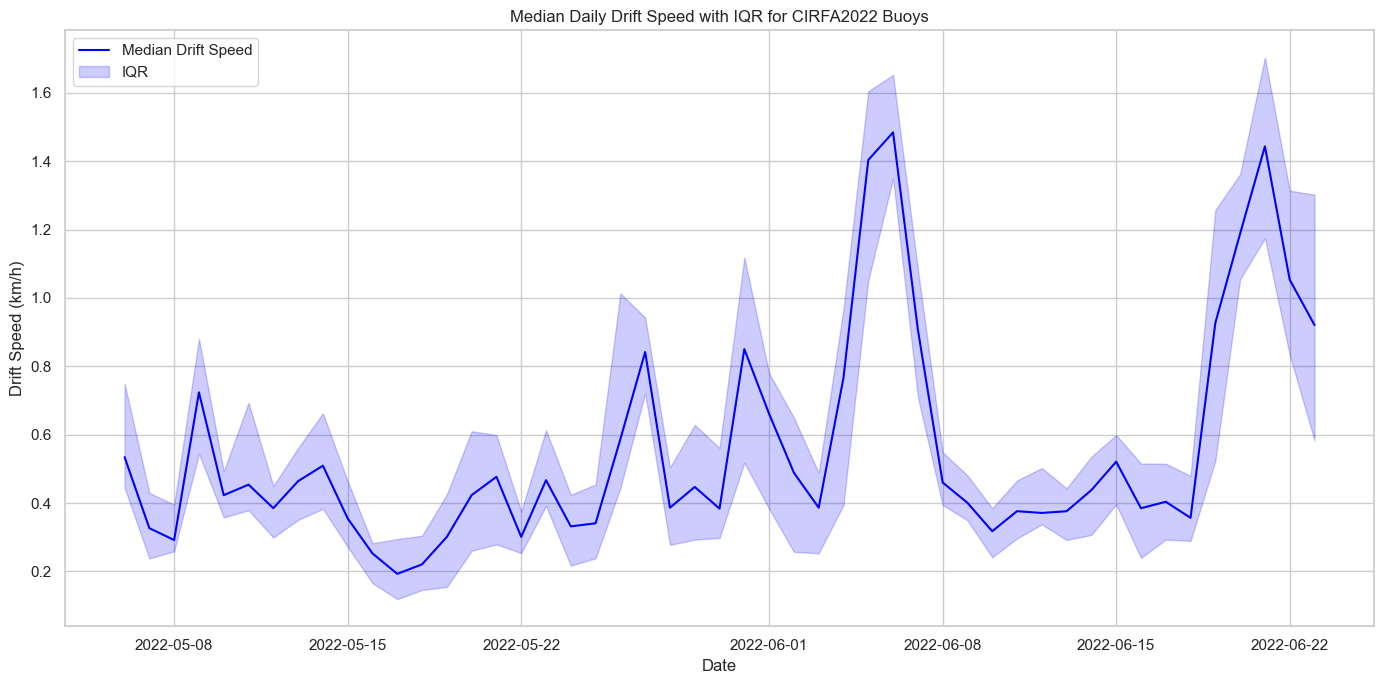

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Calculate overall daily median and IQR across all buoys
overall_daily_stats = all_daily_stats.groupby('datetime').agg(
    median_speed=('median', 'median'),
    IQR_lower=('IQR_lower', 'median'),
    IQR_upper=('IQR_upper', 'median')
).reset_index()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(overall_daily_stats['datetime'], overall_daily_stats['median_speed'], label='Median Drift Speed', color='blue')
plt.fill_between(
    overall_daily_stats['datetime'],
    overall_daily_stats['IQR_lower'],
    overall_daily_stats['IQR_upper'],
    color='blue',
    alpha=0.2,
    label='IQR'
)
plt.xlabel('Date')
plt.ylabel('Drift Speed (km/h)')
plt.title('Median Daily Drift Speed with IQR for CIRFA2022 Buoys')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import xarray as xr
import pandas as pd
import pyproj
import numpy as np

# Path to the NSIDC SIC data for 2022
sic_data_path = './NSIDC Sea Ice Concentration/nsidc_daily_sic_cdr_2022.nc'


# Load SIC data
sic_data = xr.open_dataset(sic_data_path)

# Reformat NSIDC data for convenience with interpolation
ds = xr.Dataset(
    {
        'sea_ice_concentration': (('time', 'y', 'x'), sic_data['cdr_seaice_conc'].data)
    },
    coords={
        'time': ('time', pd.to_datetime(sic_data.time.data)),
        'x': ('x', sic_data['xgrid'].data),
        'y': ('y', sic_data['ygrid'].data)
    }
)

print(ds)


<xarray.Dataset> Size: 199MB
Dimensions:                (time: 365, y: 448, x: 304)
Coordinates:
  * time                   (time) datetime64[ns] 3kB 2022-01-01 ... 2022-12-31
  * x                      (x) float32 1kB -3.838e+06 -3.812e+06 ... 3.738e+06
  * y                      (y) float32 2kB 5.838e+06 5.812e+06 ... -5.338e+06
Data variables:
    sea_ice_concentration  (time, y, x) float32 199MB 0.0 0.0 0.0 ... 0.0 0.0


In [16]:
def sic_along_track(position_data, sic_data):
    """
    Interpolates sea ice concentration (SIC) to buoy positions using nearest neighbor interpolation.

    Parameters:
    - position_data (pd.DataFrame): DataFrame containing buoy positions with 'datetime', 'longitude', and 'latitude' columns.
    - sic_data (xr.Dataset): xarray Dataset containing SIC data with coordinates 'time', 'x', and 'y'.

    Returns:
    - pd.Series: Series containing interpolated SIC values indexed by position_data's index.
    """
    # Define coordinate reference systems
    crs_wgs84 = pyproj.CRS('EPSG:4326')  # WGS84
    crs_stere = pyproj.CRS(
        '+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 '
        '+x_0=0 +y_0=0 +a=6378273 +b=6356889.449 '
        '+units=m +no_defs'
    )
    transformer = pyproj.Transformer.from_crs(crs_wgs84, crs_stere, always_xy=True)

    # Initialize SIC Series
    sic = pd.Series(data=np.nan, index=position_data.index)

    # Group positions by date for daily interpolation
    grouped = position_data.groupby(position_data['datetime'].dt.date)

    for date, group in grouped:
        try:
            # Transform coordinates to stereographic
            x_stere, y_stere = transformer.transform(group['longitude'].values, group['latitude'].values)

            # Create xarray DataArrays for interpolation
            x = xr.DataArray(x_stere, dims="z")
            y = xr.DataArray(y_stere, dims="z")

            # Select SIC data for the current date
            sic_on_date = sic_data.sel(time=pd.to_datetime(date))['sea_ice_concentration']

            # Check if SIC data is available for the date
            if sic_on_date.size == 0:
                print(f"SIC data for {date} not found. Assigning NaN.")
                sic.loc[group.index] = np.nan
                continue

            # Interpolate SIC to buoy positions
            SIC = sic_on_date.interp({'x': x, 'y': y}, method='nearest').data

            # Assign interpolated SIC values, handling masks
            SIC = np.round(SIC.T, 3)
            SIC[SIC > 1] = np.nan  # Adjust if SIC is scaled differently

            sic.loc[group.index] = SIC
        except Exception as e:
            print(f"Error processing date {date}: {e}")
            sic.loc[group.index] = np.nan

    return sic


In [17]:
# Combine all buoys into a single DataFrame
all_positions_daily = pd.concat(final_buoy_data_with_speed, names=['Buoy ID', 'Index']).reset_index(level=0)

# Ensure 'datetime' is in UTC
all_positions_daily['datetime'] = pd.to_datetime(all_positions_daily['datetime']).dt.tz_localize('UTC', ambiguous='infer')

# Resample to daily frequency at 12:00 UTC
daily_list = {}
for buoy_id, df in final_buoy_data_with_speed.items():
    # Set datetime as index
    df = df.set_index('datetime')
    
    # Resample to daily at 12:00 UTC
    df_daily = df.resample('D').agg({
        'latitude': 'mean',
        'longitude': 'mean',
        'speed_kmh': 'mean'  # or another aggregation method
    })
    df_daily['buoy_id'] = buoy_id
    daily_list[buoy_id] = df_daily

# Combine all daily positions into a single DataFrame
all_positions_daily = pd.concat(daily_list, names=['Buoy ID', 'Index']).reset_index(level=0)

print(all_positions_daily.head())


                   Buoy ID   latitude  longitude  speed_kmh         buoy_id
Index                                                                      
2022-05-06  CIRFA22_206771  79.047677  -8.572920   0.574362  CIRFA22_206771
2022-05-07  CIRFA22_206771  79.036242  -8.876861   0.269358  CIRFA22_206771
2022-05-08  CIRFA22_206771  78.997534  -8.887345   0.308304  CIRFA22_206771
2022-05-09  CIRFA22_206771  78.898607  -8.973518   0.687522  CIRFA22_206771
2022-05-10  CIRFA22_206771  78.794042  -8.977685   0.259281  CIRFA22_206771


In [18]:
# Apply the SIC interpolation function
all_positions_daily['sea_ice_concentration'] = sic_along_track(all_positions_daily, ds)

# Handle SIC Categories
mask_codes = {
    2.51: 'Pole Hole',
    2.52: 'Lakes',
    2.53: 'Coast',
    2.54: 'Land',
    2.55: 'Missing'
}

def categorize_sic(sic_value):
    if pd.isna(sic_value):
        return 'NaN'
    elif sic_value > 1:
        return mask_codes.get(sic_value, 'Unknown Mask')
    else:
        return 'Ice Concentration'

all_positions_daily['sic_category'] = all_positions_daily['sea_ice_concentration'].apply(categorize_sic)

# Example Output
print(all_positions_daily[['sea_ice_concentration', 'sic_category']].head())


KeyError: 'datetime'